# Data Exploration

## Load Libraries and Data

In [87]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')
df = pd.read_csv('data/kc_house_data.csv')

# check the columns and first few rows
df.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,0,221900.0,3,1.00,7.073270,8.639411,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,7.200425,5650
1,1,538000.0,3,2.25,7.851661,8.887653,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,7.432484,7639
2,2,180000.0,2,1.00,6.646391,9.210340,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,7.908387,8062
3,3,604000.0,4,3.00,7.580700,8.517193,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,7.215240,5000
4,4,510000.0,3,2.00,7.426549,8.997147,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,7.495542,7503


In [85]:
df.describe()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,18922.000000,18922.000000,18922.000000,18922.000000,18922.000000,18922.000000,18922.000000,18922.000000,18922.000000,18922.000000,18922.000000,18922.000000,18922.000000,18922.000000,18922.000000,18922.000000,18922.000000
mean,10777.056706,458936.562308,3.279199,2.021166,7.494024,8.945098,1.469401,0.002114,0.150354,3.407462,7.485784,1668.304302,250.773914,1971.139626,56.617694,7.502297,12298.154582
std,6225.394243,176907.638811,0.806139,0.664992,0.375606,0.895986,0.537593,0.045930,0.592897,0.642408,0.960305,675.776919,390.373618,29.042138,331.301722,0.296567,25856.847542
min,0.000000,173000.000000,1.000000,0.500000,5.913503,6.253829,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,5.988961,651.000000
25%,5404.250000,315000.000000,3.000000,1.500000,7.244228,8.517193,1.000000,0.000000,0.000000,3.000000,7.000000,1170.000000,0.000000,1952.000000,0.000000,7.293018,5001.000000
50%,10755.500000,430000.000000,3.000000,2.000000,7.512071,8.919319,1.000000,0.000000,0.000000,3.000000,7.000000,1490.000000,0.000000,1975.000000,0.000000,7.489971,7500.000000
75%,16165.750000,577000.000000,4.000000,2.500000,7.766417,9.227935,2.000000,0.000000,0.000000,4.000000,8.000000,2040.000000,490.000000,1996.000000,0.000000,7.714231,9760.750000
max,21596.000000,907500.000000,5.000000,4.000000,8.605387,14.317109,3.500000,1.000000,4.000000,5.000000,11.000000,5450.000000,2720.000000,2015.000000,2015.000000,8.448914,560617.000000


## Explore the Data

In [3]:
# get the total counts and data types for each column
print(df.shape)
print("\n")
df.info()

(21597, 21)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ M

In [4]:
# Get descriptions of each column
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
# look for duplicates
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicates: ", len(duplicate_rows_df))

Number of duplicates:  0


In [6]:
# preview 5 most frequent values of a col in a loop, for each string col.
# looking for extraneous values and getting to know the data
for col in df.columns:
    try:
        print(col, df[col].value_counts()[:5])
    except:
        print(col, df[col].value_counts())
    print('\n')

id 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64


date 6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64


price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64


sqft_lot 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: 

In [7]:
# replace extraneous value '?' in 'sqft_basement' col to equal 0 as that is mode
# convert to type to float
df.sqft_basement = df.sqft_basement.map(lambda x: '0' if x == '?' else x)
df.sqft_basement = df.sqft_basement.astype('float')

In [8]:
# see results
df.sqft_basement.value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [9]:
# check for null values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Scrub the Data

In [10]:
# analyze waterfront column
print(df['waterfront'].value_counts())

0.0    19075
1.0      146
Name: waterfront, dtype: int64


In [11]:
# values are either yes (1.0) or no (0.0)
# since the cells are blank, it is best to assume that the houses do not have a waterfront view
# the empty cells should be filled with 0.0
df['waterfront'].fillna(0, inplace=True)
print(df.isnull().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [12]:
# how much is missing from year renovated - 18%
# printed most common values so that we know what to replace the nulls with
print('Percentage of Null yr_renovated Values:', len(df[df.yr_renovated.isna()])/ len(df))
print('Number of Unique yr_renovated Values:', df.yr_renovated.nunique())
print('Number of Unique Values:', df.yr_renovated.value_counts())

Percentage of Null yr_renovated Values: 0.17789507802009538
Number of Unique yr_renovated Values: 70
Number of Unique Values: 0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64


In [13]:
# 0.0 is the mode
# a number equals the year the home was renovated and 0.0 means the home was never renovated
# we should then also assume that the blank cells mean that these homes were never renovated
# convert nan to 0.0
df.loc[df.yr_renovated.isna(), 'yr_renovated'] = 0.0

In [14]:
# see results
df.yr_renovated.value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [15]:
# analyze view column
print(df['view'].value_counts())

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64


In [16]:
views_mean = df['view'].mean()
views_median = df['view'].median()
views_mode = df['view'].mode()
print('Viewed Mean: ', views_mean)
print('Viewed Median: ', views_median)
print('Viewed Mode: ', views_mode)

Viewed Mean:  0.23386272870808952
Viewed Median:  0.0
Viewed Mode:  0    0.0
dtype: float64


In [17]:
# both the median and mode are 0.0
# the mean rounded to the nearest whole number is also 0.0
# it is best to assume the cells were left blank because they were not viewed
# the blank num_views cells should be changed to 0.0
df['view'] = df['view'].fillna(0.0)
print(df['view'].value_counts())

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64


In [18]:
print(df.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [19]:
# see if all null values are filled
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


In [20]:
# Converting date to datetime
df.date = pd.to_datetime(df.date)

## EDA with Visualizations

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\15514\anaco

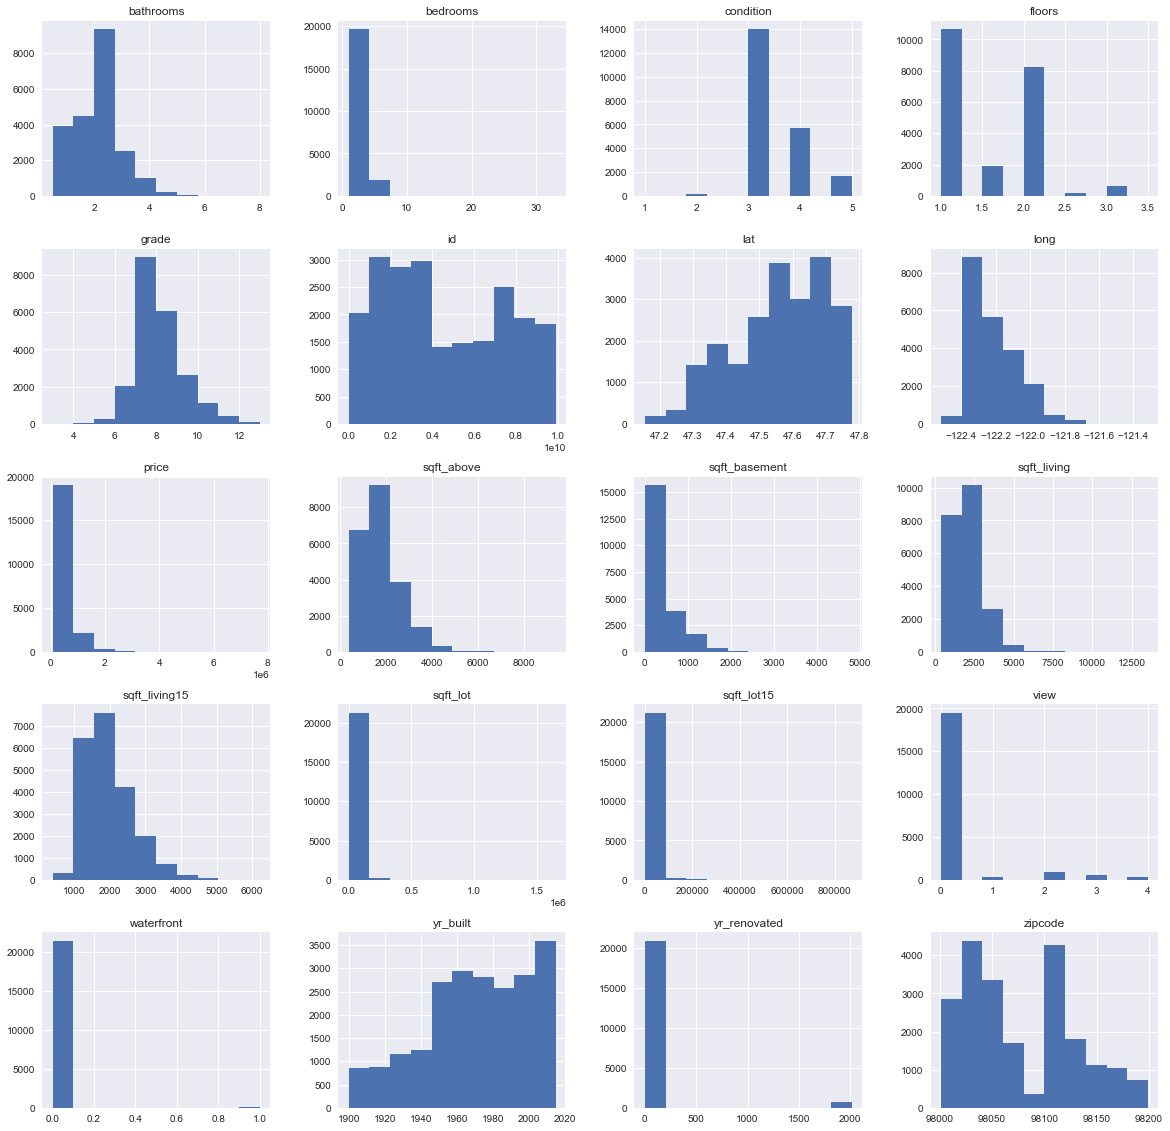

In [21]:
#look at distributions of each column
df.hist(figsize=(20,20));

## Dealing with Categorical Features

In [22]:
df.nunique() #take a look at unique values

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      303
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [23]:
drop_vars = ['id', 'date', 'zipcode']
df.drop(columns=drop_vars, axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,47.6168,-122.045,1800,7503


In [24]:
# creating column "class_scale" based on condition of price
df.loc[df['price'] > 750000, 'class_scale'] = "upper"
df.loc[(df['price'] < 750000) & (df['price'] > 350000), 'class_scale'] = "middle"
df.loc[df['price'] < 350000, 'class_scale'] = "lower"

In [25]:
grouped = df.groupby(['class_scale'])['price'].agg(['mean','min', 'max', 'std']).round()
grouped.head()

,mean,min,max,std
class_scale,,,,
lower,267015.0,78000.0,349990.0,54355.0
middle,513097.0,350500.0,749999.0,107887.0
upper,1134069.0,750500.0,7700000.0,526345.0


In [26]:
df.class_scale.value_counts(normalize=True)

middle    0.522308
lower     0.309963
upper     0.167729
Name: class_scale, dtype: float64

In [27]:
grade_dummies = pd.get_dummies(df['grade'], prefix='gr', drop_first=True)
condition_dummies = pd.get_dummies(df['condition'], prefix='condit', drop_first=True)
class_dummies = pd.get_dummies(df['class_scale'], prefix='class', drop_first=True)

In [28]:
df = df.drop(['grade', 'condition', 'class_scale'], axis=1)
df = pd.concat([df, grade_dummies, condition_dummies, class_dummies], axis = 1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,...,gr_10,gr_11,gr_12,gr_13,condit_2,condit_3,condit_4,condit_5,class_middle,class_upper
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,1180,0.0,...,0,0,0,0,0,1,0,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,2170,400.0,...,0,0,0,0,0,1,0,0,1,0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,770,0.0,...,0,0,0,0,0,1,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,1050,910.0,...,0,0,0,0,0,0,0,1,1,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,1680,0.0,...,0,0,0,0,0,1,0,0,1,0


## Removing Outliers

In [29]:
# after looking over the data, major outliers were only found in the bathrooms and bedrooms columns

### Dependant Variable - Price

In [30]:
from numpy import mean
from numpy import std

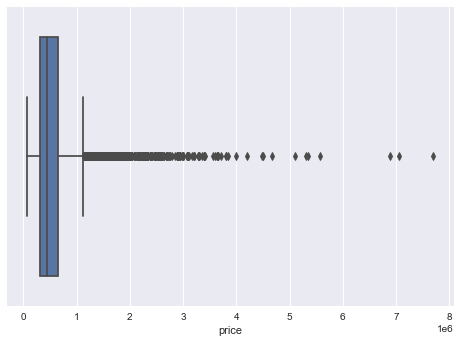

In [31]:
sns.boxplot(x=df['price'])

In [32]:
# calculate summary statistics
data_mean, data_std = mean(df.price), std(df.price)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

In [33]:
# identify outliers
outliers = [x for x in df.price if x < lower or x > upper]

In [34]:
sorted(outliers)

[1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1660000.0,
 1660000.0,
 1660000.0,
 1660000.0,
 1670000.0,
 1670000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1690000.0,
 1690000.0,
 1690000.0,
 1690000.0,
 1690000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1710000.0,
 1710000.0,
 1710000.0,
 1710000.0,
 1710000.0,
 1720000.0,
 1720000.0,
 1720000.0,
 1730000.0,
 1730000.0,
 1730000.0,
 1730000.0,
 1740000.0,
 1740000.0,
 1740000.0,
 1740000.0,
 1740000.0,
 1740000.0,
 1740000.0,
 1750000.0,
 1750000.0,
 1750000.0,
 175

In [35]:
#subset price to eliminate outliers 
df = df[df.price < 1650000]

### Number of Bedrooms

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


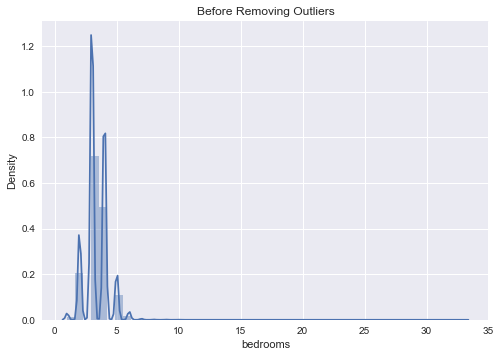

In [36]:
# identify outliers
plt.title('Before Removing Outliers')
sns.distplot(df['bedrooms'])
plt.show();

In [37]:
# remove outliers
count = 0
bed_outliers = []
mean = np.mean(df['bedrooms'])
max_distance = np.std(df['bedrooms']) * 3

for idx, row in df['bedrooms'].T.iteritems():
    if abs(row-mean) >= max_distance:
        count += 1
        df.drop(idx,inplace=True)
count

52

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


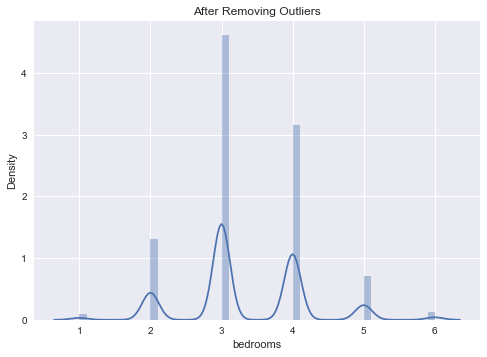

In [38]:
plt.title('After Removing Outliers')
sns.distplot(df['bedrooms'])
plt.show();

### Number of Bathrooms

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


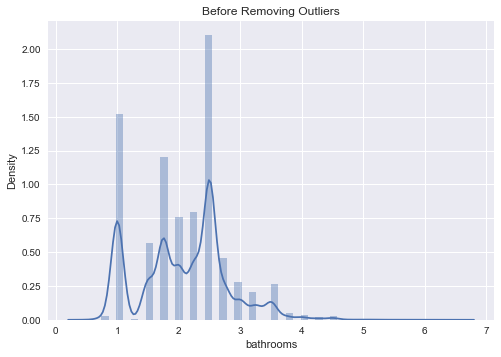

In [39]:
# identify outliers
plt.title('Before Removing Outliers')
sns.distplot(df['bathrooms'])
plt.show();

In [40]:
# remove outliers
count = 0
bath_outliers = []
mean = np.mean(df['bathrooms'])
max_distance = np.std(df['bathrooms']) * 3

for idx, row in df['bathrooms'].T.iteritems():
    if abs(row-mean) >= max_distance:
        count += 1
        df.drop(idx, inplace=True)
count

99

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


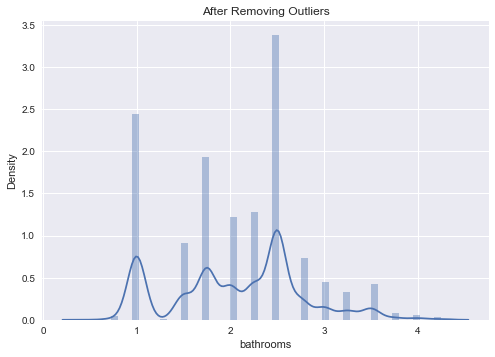

In [41]:
plt.title('After Removing Outliers')
sns.distplot(df['bathrooms'])
plt.show();

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21040 entries, 0 to 21596
Data columns (total 32 columns):
price            21040 non-null float64
bedrooms         21040 non-null int64
bathrooms        21040 non-null float64
sqft_living      21040 non-null int64
sqft_lot         21040 non-null int64
floors           21040 non-null float64
waterfront       21040 non-null float64
view             21040 non-null float64
sqft_above       21040 non-null int64
sqft_basement    21040 non-null float64
yr_built         21040 non-null int64
yr_renovated     21040 non-null float64
lat              21040 non-null float64
long             21040 non-null float64
sqft_living15    21040 non-null int64
sqft_lot15       21040 non-null int64
gr_4             21040 non-null uint8
gr_5             21040 non-null uint8
gr_6             21040 non-null uint8
gr_7             21040 non-null uint8
gr_8             21040 non-null uint8
gr_9             21040 non-null uint8
gr_10            21040 non-null uint8

In [43]:
# sqft_living equals sqft_above and sqft_basement so we will drop those columns
df = df.drop(['sqft_above', 'sqft_basement'], axis=1)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,yr_built,yr_renovated,...,gr_10,gr_11,gr_12,gr_13,condit_2,condit_3,condit_4,condit_5,class_middle,class_upper
count,2.104000e+04,21040.000000,21040.000000,21040.000000,2.104000e+04,21040.000000,21040.000000,21040.000000,21040.000000,21040.000000,...,21040.000000,21040.000000,21040.000000,21040.0,21040.000000,21040.000000,21040.000000,21040.000000,21040.000000,21040.000000
mean,5.043270e+05,3.336977,2.071732,2018.100998,1.470228e+04,1.484030,0.003707,0.202139,1970.867776,64.596816,...,0.046150,0.011835,0.001378,0.0,0.008032,0.648479,0.264211,0.077899,0.527139,0.146721
std,2.565535e+05,0.862274,0.709809,816.510324,3.987405e+04,0.537846,0.060775,0.701837,29.269320,353.216035,...,0.209815,0.108144,0.037101,0.0,0.089265,0.477457,0.440923,0.268019,0.499275,0.353836
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1900.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.199500e+05,3.000000,1.500000,1410.000000,5.001000e+03,1.000000,0.000000,0.000000,1951.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.450000e+05,3.000000,2.250000,1890.000000,7.555000e+03,1.000000,0.000000,0.000000,1975.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,6.250000e+05,4.000000,2.500000,2490.000000,1.045550e+04,2.000000,0.000000,0.000000,1996.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.640000e+06,6.000000,4.250000,7350.000000,1.651359e+06,3.500000,1.000000,4.000000,2015.000000,2015.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Linear Regression

## Run A Baseline Model

In [44]:
# import libraries
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import datasets, linear_model

In [45]:
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
          'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
predictors = '+'.join(x_cols)
f = outcome + '~' + predictors
baseline = ols(formula=f, data=df).fit()
baseline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     3050.
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:48:57   Log-Likelihood:            -2.8076e+05
No. Observations:               21040   AIC:                         5.615e+05
Df Residuals:                   21026   BIC:                         5.617e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.781e+07   1.15e+06    -33.003      0.000   -4.01e+07   -3.56e+07
bedrooms      -2.397e+04   1559.133    -15.375      0.000    -2.7e+04   -2.09e+04
bathrooms      4.383e+04   2535.388     17.286      0.000    3.89e+04    4.88e+04
sqft_living     141.8786      2.581     54.973      0.000     136.820     146.937
sqft_lot          0.2026      0.037      5.424      0.000       0.129       0.276
floors         4.451e+04   2411.395     18.460      0.000    3.98e+04    4.92e+04
waterfront      1.95e+05   1.81e+04     10.791      0.000     1.6e+05     2.3e+05
view           4.382e+04   1652.789     26.514      0.000    4.06e+04    4.71e+04
yr_built      -1682.1336     51.066    -32.941      0.000   -1782.226   -1582.041
yr_renovated     17.9539      3.073      5.842      0.000      11.930      23.977
lat             5.94e+05   7749.307     76.646      0.000    5.79e+05    6.09e+05
long           -1.05e+05   8761.311    -11.980      0.000   -1.22e+05   -8.78e+04
sqft_living15    93.5842      2.574     36.357      0.000      88.539      98.629
sqft_lot15       -0.2374      0.057     -4.171      0.000      -0.349      -0.126
==============================================================================
Omnibus:                     4655.103   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16546.574
Skew:                           1.090   Prob(JB):                         0.00
Kurtosis:                       6.758   Cond. No.                     5.37e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.37e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Location Variables

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

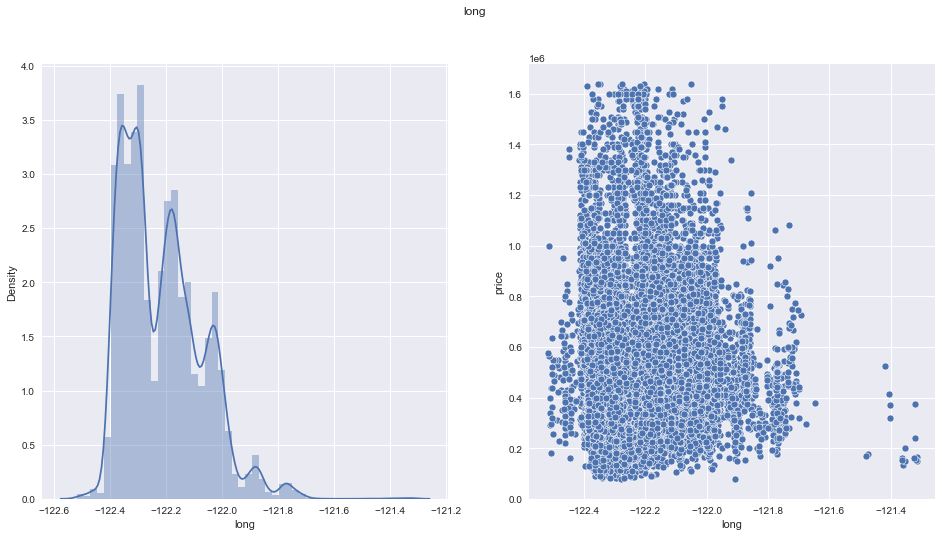

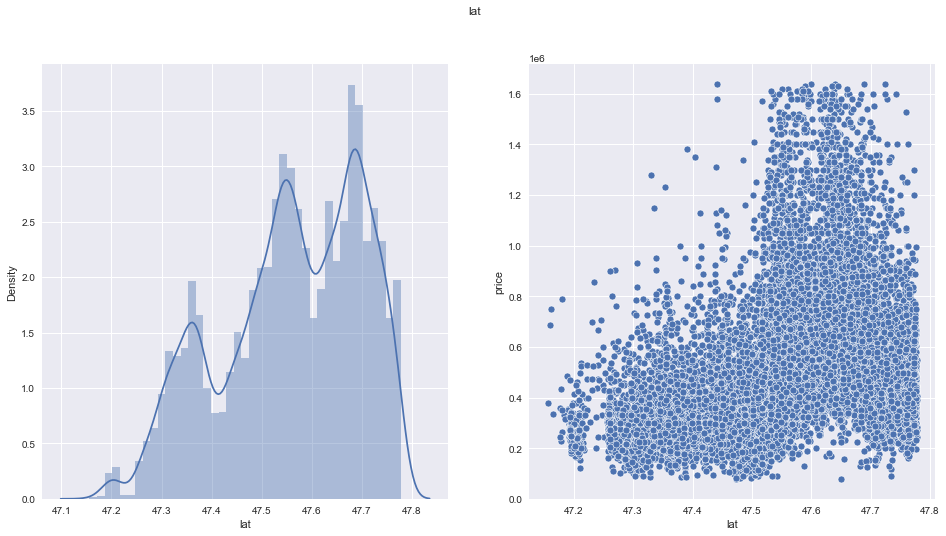

In [46]:
target = df['price'].copy()
location = df[['long', 'lat']].copy()

for col in location:
    x = location[col]
    y = target

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    sns.distplot(x)
    plt.subplot(1,2,2)

    sns.scatterplot(x, y)
    plt.suptitle(col)
    plt.tight_layout
    plt.savefig(col + '.png')

In [47]:
location.head()

,long,lat
0,-122.257,47.5112
1,-122.319,47.7210
2,-122.233,47.7379
3,-122.393,47.5208
4,-122.045,47.6168


In [48]:
location['long_lat'] = list(zip(location['long'], location['lat']))
location.head()

,long,lat,long_lat
0,-122.257,47.5112,"(-122.257, 47.5112)"
1,-122.319,47.7210,"(-122.319, 47.721000000000004)"
2,-122.233,47.7379,"(-122.23299999999999, 47.7379)"
3,-122.393,47.5208,"(-122.39299999999999, 47.5208)"
4,-122.045,47.6168,"(-122.045, 47.6168)"


In [49]:
# calculate distance from point A to Seattle using haversine
from math import radians, cos, sin, asin, sqrt

def haversine(list_long_lat, other=[-122.336283, 47.609395]):

    lon1, lat1 = list_long_lat[0], list_long_lat[1]
    lon2, lat2 = other[0], other[1]
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # radius of earth in kilometers is 6371
    km = 6371 * c
    return km

In [50]:
location['dist_to_seattle'] = location['long_lat'].apply(haversine)

In [51]:
# add bellevue to locations
location['dist_to_bellevue'] = location['long_lat'].apply(haversine, other=[-122.198985, 47.615577])

In [52]:
feat_engineer = location.loc[:,['dist_to_seattle', 'dist_to_bellevue']]

In [53]:
feat_engineer.head()

,dist_to_seattle,dist_to_bellevue
0,12.434278,12.395639
1,12.477217,14.770934
2,16.247460,13.838051
3,10.731122,17.970486
4,21.850148,11.542868


In [54]:
# drop the original lat and long columns and join the feature engineered columns
df.drop(['lat', 'long'], axis=1)
df['dist_to_seattle'] = feat_engineer['dist_to_seattle']
df['dist_to_bellevue'] = feat_engineer['dist_to_bellevue']
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,yr_built,yr_renovated,...,gr_12,gr_13,condit_2,condit_3,condit_4,condit_5,class_middle,class_upper,dist_to_seattle,dist_to_bellevue
count,2.104000e+04,21040.000000,21040.000000,21040.000000,2.104000e+04,21040.000000,21040.000000,21040.000000,21040.000000,21040.000000,...,21040.000000,21040.0,21040.000000,21040.000000,21040.000000,21040.000000,21040.000000,21040.000000,21040.000000,21040.000000
mean,5.043270e+05,3.336977,2.071732,2018.100998,1.470228e+04,1.484030,0.003707,0.202139,1970.867776,64.596816,...,0.001378,0.0,0.008032,0.648479,0.264211,0.077899,0.527139,0.146721,18.775592,17.589401
std,2.565535e+05,0.862274,0.709809,816.510324,3.987405e+04,0.537846,0.060775,0.701837,29.269320,353.216035,...,0.037101,0.0,0.089265,0.477457,0.440923,0.268019,0.499275,0.353836,10.811697,9.231464
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1900.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.355938,0.640900
25%,3.199500e+05,3.000000,1.500000,1410.000000,5.001000e+03,1.000000,0.000000,0.000000,1951.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.839943,11.477873
50%,4.450000e+05,3.000000,2.250000,1890.000000,7.555000e+03,1.000000,0.000000,0.000000,1975.000000,0.000000,...,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,16.818670,15.389140
75%,6.250000e+05,4.000000,2.500000,2490.000000,1.045550e+04,2.000000,0.000000,0.000000,1996.000000,0.000000,...,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,25.703491,21.645466
max,1.640000e+06,6.000000,4.250000,7350.000000,1.651359e+06,3.500000,1.000000,4.000000,2015.000000,2015.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,77.347317,67.078947


# Model 2

Greatly increased our r-squared by incorporating our categorical features through one-hot encoding:
    - Distance to cities (Seattle and Bellevue)
    - Condition (1 - 5 scale)
    - Grade (3 - 13 scale)
    - Class (upper, middle, lower)

In [55]:
# try the baseline with the new columns
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
          'yr_built', 'yr_renovated', 'dist_to_seattle', 'dist_to_bellevue', 'sqft_living15', 'sqft_lot15', 'gr_4', 'gr_5', 'gr_6', 'gr_7', 'gr_8',
       'gr_9', 'gr_10', 'gr_11', 'gr_12', 'gr_13', 'condit_2', 'condit_3',
       'condit_4', 'condit_5', 'class_middle', 'class_upper']
predictors = '+'.join(x_cols)
f = outcome + '~' + predictors
baseline2 = ols(formula=f, data=df).fit()
baseline2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     4254.
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        18:48:59   Log-Likelihood:            -2.7195e+05
No. Observations:               21040   AIC:                         5.440e+05
Df Residuals:                   21011   BIC:                         5.442e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.896e+06   1.25e+05     15.145      0.000    1.65e+06    2.14e+06
bedrooms         -8076.5071   1054.248     -7.661      0.000   -1.01e+04   -6010.100
bathrooms         1.875e+04   1704.439     11.002      0.000    1.54e+04    2.21e+04
sqft_living         46.3417      1.868     24.814      0.000      42.681      50.002
sqft_lot             0.1169      0.025      4.734      0.000       0.068       0.165
floors            1.346e+04   1671.566      8.055      0.000    1.02e+04    1.67e+04
waterfront        1.416e+05   1.19e+04     11.886      0.000    1.18e+05    1.65e+05
view              2.206e+04   1103.257     19.997      0.000    1.99e+04    2.42e+04
yr_built          -797.8817     39.205    -20.351      0.000    -874.727    -721.036
yr_renovated         8.9487      2.061      4.342      0.000       4.909      12.988
dist_to_seattle  -1182.3268    149.026     -7.934      0.000   -1474.429    -890.225
dist_to_bellevue -3852.0338    162.511    -23.703      0.000   -4170.568   -3533.499
sqft_living15       18.9665      1.847     10.268      0.000      15.346      22.587
sqft_lot15           0.0713      0.038      1.897      0.058      -0.002       0.145
gr_4             -1.746e+05   1.01e+05     -1.724      0.085   -3.73e+05    2.39e+04
gr_5             -1.579e+05   9.97e+04     -1.584      0.113   -3.53e+05    3.75e+04
gr_6             -1.408e+05   9.95e+04     -1.414      0.157   -3.36e+05    5.43e+04
gr_7             -1.009e+05   9.95e+04     -1.014      0.311   -2.96e+05    9.42e+04
gr_8             -6.464e+04   9.96e+04     -0.649      0.516    -2.6e+05     1.3e+05
gr_9             -1.629e+04   9.96e+04     -0.164      0.870   -2.12e+05    1.79e+05
gr_10             2.464e+04   9.97e+04      0.247      0.805   -1.71e+05     2.2e+05
gr_11             1.105e+05   9.99e+04      1.107      0.268   -8.52e+04    3.06e+05
gr_12             2.907e+05   1.01e+05      2.866      0.004    9.19e+04    4.89e+05
gr_13            -8.194e-11    1.5e-10     -0.546      0.585   -3.76e-10    2.12e-10
condit_2          1.329e+04   2.01e+04      0.663      0.508    -2.6e+04    5.26e+04
condit_3          3.688e+04   1.86e+04      1.978      0.048     325.666    7.34e+04
condit_4          5.153e+04   1.87e+04      2.762      0.006     1.5e+04    8.81e+04
condit_5          7.122e+04   1.88e+04      3.794      0.000    3.44e+04    1.08e+05
class_middle      1.307e+05   1960.596     66.685      0.000    1.27e+05    1.35e+05
class_upper        4.34e+05   3464.272    125.286      0.000    4.27e+05    4.41e+05
==============================================================================
Omnibus:                     5073.169   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21356.082
Skew:                           1.133   P

## Checking Assumptions

In [56]:
# all of the columsn have a P value that is less than .05, but some of them have negative coefficient values
# let's check if there are any other issues before we run another model

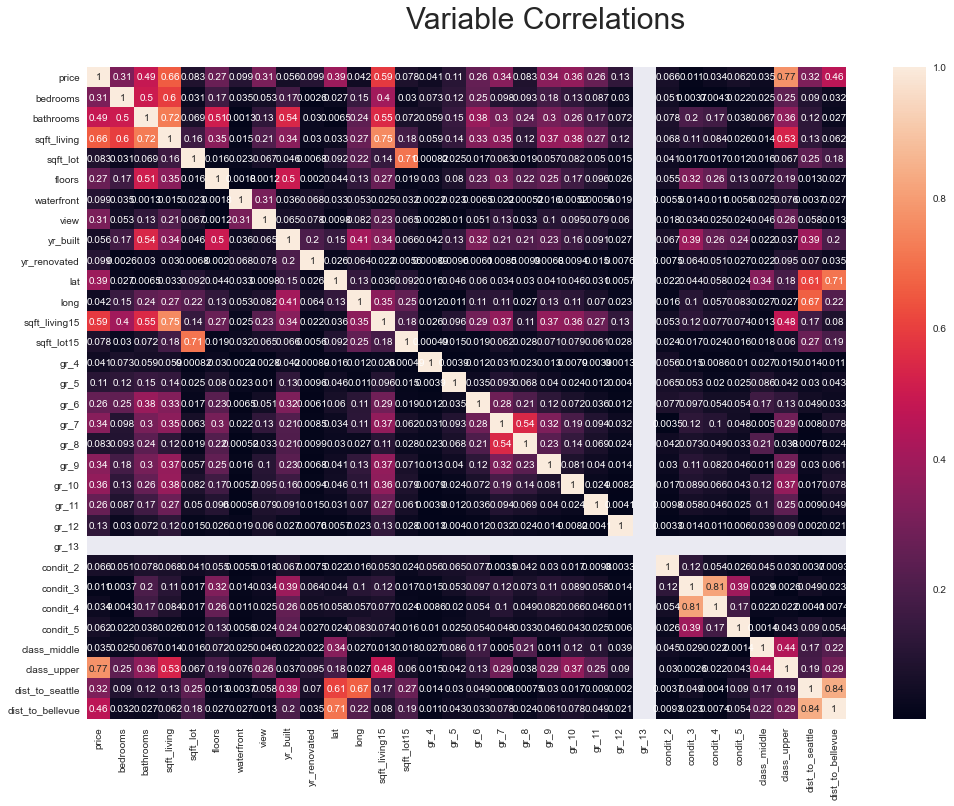

In [57]:
corr = df.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=30, y=.95)
heatmap = sns.heatmap(corr, annot=True)
heatmap

In [58]:
# the heatmap does provide much
# create functions to find any multicollinearity issues
# find the columns with the most correlations to the dependant variable
features = []
correlations = []
for idx, correlation in corr['price'].T.iteritems():
    if correlation >= .30 and idx != 'price':
        features.append(idx)
        correlations.append(correlation)
corr_price_df = pd.DataFrame({'Correlations':correlations, 'Features': features}).sort_values(by=['Correlations'], ascending=False)

In [59]:
# usually any variables that correlate more than 80% have multicollinearity
# one of those columns will need to be dropped
multicollinear_features = []
multicollinear_corr = []
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.iteritems():
        if correlation >= .80 and idx != feature:
            multicollinear_features.append([feature, idx])
            multicollinear_corr.append(correlation)
            
for feature in corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame({'Correlations':multicollinear_corr, 'Features': multicollinear_features})
print('Multicollinear Features')
display(MC_df)

Multicollinear Features


,Correlations,Features
0,0.813900,"[condit_3, condit_4]"
1,0.813900,"[condit_4, condit_3]"
2,0.838475,"[dist_to_seattle, dist_to_bellevue]"
3,0.838475,"[dist_to_bellevue, dist_to_seattle]"


In [60]:
print('Correlations with Price')
display(corr_price_df)

Correlations with Price


,Correlations,Features
9,0.774301,class_upper
2,0.658991,sqft_living
5,0.590026,sqft_living15
1,0.485666,bathrooms
11,0.462724,dist_to_bellevue
4,0.387991,lat
8,0.363987,gr_10
7,0.344217,gr_9
6,0.343690,gr_7
10,0.320436,dist_to_seattle


# Create Interactions

This increased the r-squared slightly

In [61]:
df['interaction_dist'] = df['dist_to_bellevue'] * df['dist_to_seattle']
df['interaction_bb'] = df['bathrooms'] * df['bedrooms']

# Bring in final df with interactions and categorical features normalized

In [62]:
df.to_pickle('df_dummy_and_interactions.pkl')

In [79]:
final_df = pd.read_pickle('final_df.pkl')
final_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,yr_built,yr_renovated,...,class_upper,dist_to_seattle,dist_to_bellevue,interaction_dist,interaction_bb,qt_sqft_living,qt_sqft_living15,qt_sqft_lot,qt_interaction_dist,qt_interaction_bb
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,1951,1991.0,...,0,12.477217,14.770934,184.300139,6.75,0.979511,-0.213636,-0.032206,-0.214791,-0.098013
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,1965,0.0,...,0,10.731122,17.970486,192.843486,12.00,0.152391,-1.033647,-0.625670,-0.177368,1.497997
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,1987,0.0,...,0,21.850148,11.542868,252.213384,6.00,-0.263985,-0.008782,0.217029,0.075922,-0.257495
6,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,1995,0.0,...,0,33.331870,35.347235,1178.189446,6.75,-0.211001,0.695269,-0.153439,1.472721,-0.098013
7,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,1963,0.0,...,0,22.284717,24.515385,546.318409,4.50,-1.428482,-0.296607,0.591748,0.722041,-0.729877


In [80]:
final_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,yr_built,yr_renovated,...,class_upper,dist_to_seattle,dist_to_bellevue,interaction_dist,interaction_bb,qt_sqft_living,qt_sqft_living15,qt_sqft_lot,qt_interaction_dist,qt_interaction_bb
count,15867.000000,15867.000000,15867.000000,15867.000000,1.586700e+04,15867.000000,15867.000000,15867.000000,15867.000000,15867.000000,...,15867.000000,15867.000000,15867.000000,15867.000000,15867.000000,15867.000000,15867.000000,15867.000000,15867.000000,15867.000000
mean,455054.161845,3.306989,2.047725,1925.445075,1.406182e+04,1.485757,0.002017,0.143379,1971.891536,51.651478,...,0.008130,18.759859,17.651508,408.274756,7.020120,0.000052,0.000163,-0.000047,0.000011,0.003329
std,137179.019321,0.839647,0.642228,659.511553,3.724996e+04,0.545762,0.044865,0.574842,29.184235,316.766885,...,0.089803,10.661958,8.696739,442.985911,3.291366,1.000066,1.000436,0.999819,1.000455,0.987578
min,247800.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1900.000000,0.000000,...,0.000000,1.355938,0.662987,6.831179,0.500000,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
25%,339950.000000,3.000000,1.750000,1440.000000,4.890500e+03,1.000000,0.000000,0.000000,1952.000000,0.000000,...,0.000000,9.791792,11.975168,118.714831,4.500000,-0.672129,-0.681594,-0.674711,-0.674595,-0.729877
50%,435000.000000,3.000000,2.250000,1850.000000,7.334000e+03,1.000000,0.000000,0.000000,1976.000000,0.000000,...,0.000000,16.908554,15.453618,231.446475,7.000000,0.000000,-0.008782,0.000418,0.000149,0.022584
75%,555000.000000,4.000000,2.500000,2340.000000,1.008450e+04,2.000000,0.000000,0.000000,1998.000000,0.000000,...,0.000000,25.465220,21.295250,490.557776,9.750000,0.675277,0.672129,0.674455,0.674280,0.678433
max,760750.000000,6.000000,4.250000,5461.000000,1.651359e+06,3.500000,1.000000,4.000000,2015.000000,2015.000000,...,1.000000,76.917427,66.651354,5126.650671,24.000000,5.199338,5.199338,5.199338,5.199338,5.199338


we also did an interaction for condition 3 and 4 , but when brought into the model there was coefficient of 0 so did not use in model

interaction_bb has high p-value so removed that as well

# Model 3

Removed due to low coefficient and/or high p-value:
    - sqft_lot15, gr_9, gr_10, condit_2

In [81]:
outcome = 'price'
x_cols = ['qt_sqft_living', 'qt_sqft_lot', 'qt_sqft_living15',
          'gr_4', 'gr_5', 'gr_6', 'gr_7', 'gr_8','gr_11', 'gr_12', 
          'condit_3', 'condit_4', 'condit_5', 
          'class_middle', 'class_upper', 'qt_interaction_bb','qt_interaction_dist']
predictors = '+'.join(x_cols)
f = outcome + '~' + predictors
baseline3 = ols(formula=f, data=final_df).fit()
baseline3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     2036.
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        19:17:00   Log-Likelihood:            -2.0134e+05
No. Observations:               15867   AIC:                         4.027e+05
Df Residuals:                   15850   BIC:                         4.029e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            4.161e+05   8037.369     51.777      0.000       4e+05    4.32e+05
qt_sqft_living       3.256e+04   1206.900     26.978      0.000    3.02e+04    3.49e+04
qt_sqft_lot          7733.9789    788.987      9.802      0.000    6187.474    9280.484
qt_sqft_living15     1.698e+04    920.231     18.457      0.000    1.52e+04    1.88e+04
gr_4                -6.456e+04   2.81e+04     -2.301      0.021    -1.2e+05   -9563.938
gr_5                -6.799e+04   8491.300     -8.007      0.000   -8.46e+04   -5.13e+04
gr_6                -9.957e+04   3648.695    -27.288      0.000   -1.07e+05   -9.24e+04
gr_7                -8.616e+04   2531.958    -34.028      0.000   -9.11e+04   -8.12e+04
gr_8                -5.394e+04   2309.355    -23.357      0.000   -5.85e+04   -4.94e+04
gr_11                4.633e+04   1.97e+04      2.346      0.019    7615.065     8.5e+04
gr_12               -1.727e-10   1.74e-11     -9.907      0.000   -2.07e-10   -1.38e-10
condit_3             9606.4167   7672.516      1.252      0.211   -5432.587    2.46e+04
condit_4             2.262e+04   7698.281      2.939      0.003    7534.556    3.77e+04
condit_5             4.386e+04   7945.385      5.521      0.000    2.83e+04    5.94e+04
class_middle         1.259e+05   1634.513     77.005      0.000    1.23e+05    1.29e+05
class_upper          2.798e+05   7245.430     38.611      0.000    2.66e+05    2.94e+05
qt_interaction_bb   -7114.8792    993.450     -7.162      0.000   -9062.154   -5167.604
qt_interaction_dist -5.132e+04    815.091    -62.959      0.000   -5.29e+04   -4.97e+04
==============================================================================
Omnibus:                      899.049   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1252.378
Skew:                           0.518   Prob(JB):                    1.12e-272
Kurtosis:                       3.907   Cond. No.                     1.81e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.32e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


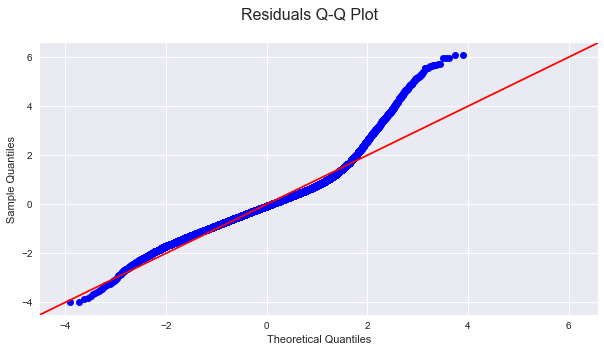

In [66]:
# Model 1

residuals = baseline.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals Q-Q Plot', fontsize=16)
fig.set_size_inches(10,5)
fig.show()

In [67]:
# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(baseline.resid)/ len(baseline.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

The mean of the residuals is 4.821e-08


C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


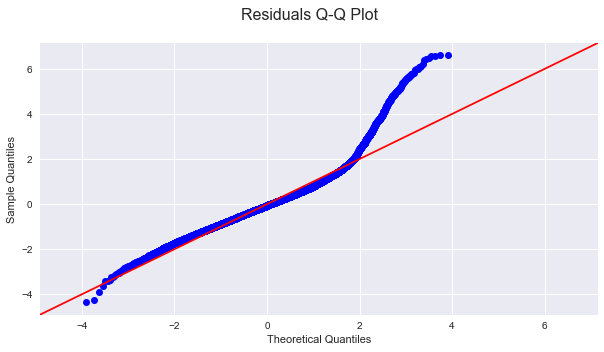

In [68]:
# Model 2

residuals = baseline2.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals Q-Q Plot', fontsize=16)
fig.set_size_inches(10,5)
fig.show()

In [69]:
# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(baseline2.resid)/ len(baseline2.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

The mean of the residuals is -1.69e-08


C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


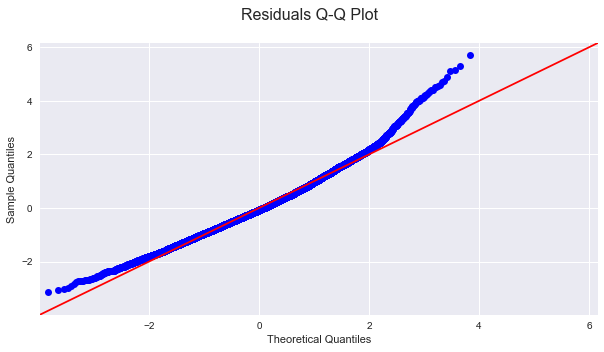

In [82]:
# Model 3

residuals = baseline3.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals Q-Q Plot', fontsize=16)
fig.set_size_inches(10,5)
fig.show()

In [83]:
# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(baseline3.resid)/ len(baseline3.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

The mean of the residuals is 2.161e-10
